In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

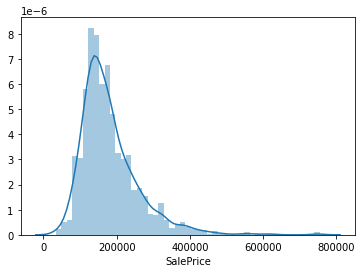

In [8]:
pd.set_option('display.max_rows', None)


train = pd.read_csv('./data/train.csv')
test  = pd.read_csv('./data/test.csv')


# 求めるラベルであるSalePriceについて確認
display(train['SalePrice'].describe())
sns.distplot(train['SalePrice'])

In [9]:
# 正規分布のズレを確認する
skew = train['SalePrice'].skew()
kurt = train['SalePrice'].kurt()
print(f'歪度: {skew}')
print(f'尖度: {kurt}')

歪度: 1.8828757597682129
尖度: 6.536281860064529


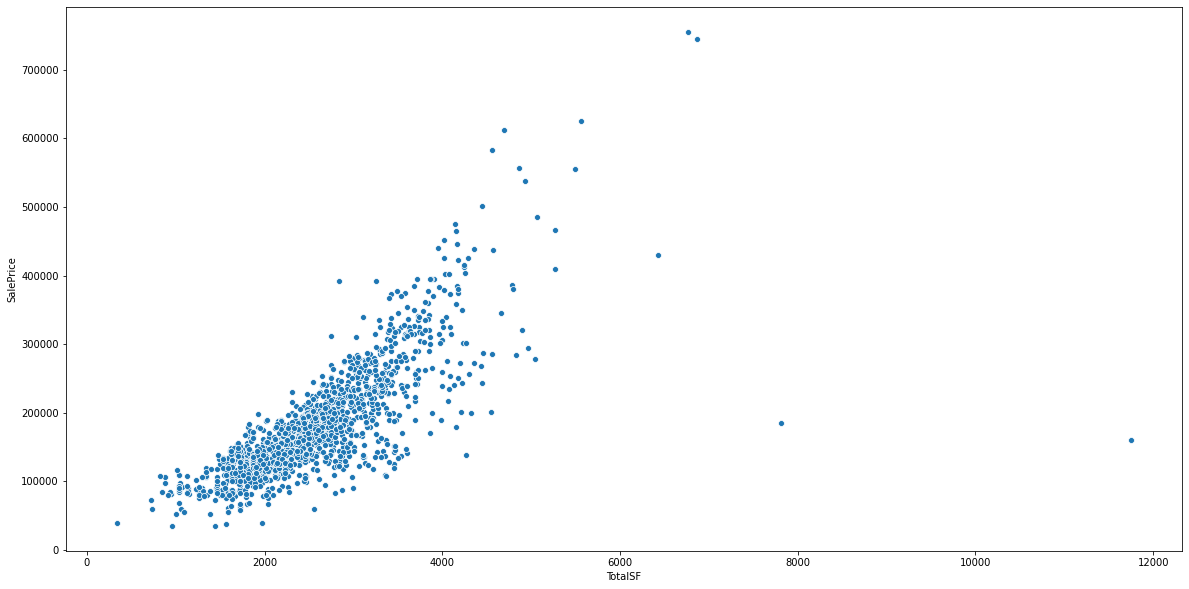

1298    11752
523      7814
1182     6872
691      6760
496      6428
1169     5557
440      5496
1353     5271
1373     5266
798      5066
Name: TotalSF, dtype: int64

533     334
1321    720
1100    728
532     827
1035    845
259     882
392     882
1218    912
1049    930
1000    944
Name: TotalSF, dtype: int64

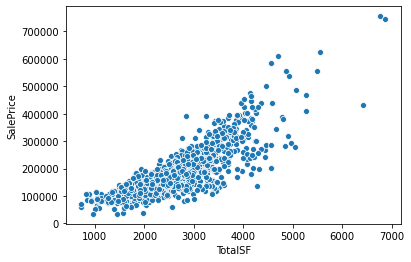

In [10]:
# 広さの特徴量を確認
plt.figure(figsize=(20, 10))

"""
display(train['1stFlrSF'].head())

plt.scatter(train["1stFlrSF"], train["SalePrice"])
plt.xlabel("1stFlrSF")
plt.ylabel("SalePrice")

display(train['2ndFlrSF'].head())
plt.scatter(train["2ndFlrSF"], train["SalePrice"])

display(train['TotalBsmtSF'].head())
plt.scatter(train["TotalBsmtSF"], train["SalePrice"])
"""
# 広さの合計の特徴量を作る
train['TotalSF'] = train['1stFlrSF'] + train['2ndFlrSF'] + train['TotalBsmtSF']

# 線形性が何となくみて取れる
sns.scatterplot(data=train, x='TotalSF', y='SalePrice')
plt.show()

# 大きい順で確認
sorted = train['TotalSF'].sort_values(ascending=False)
display(sorted.head(10))

# 小さい順で確認
sorted = train['TotalSF'].sort_values()
display(sorted.head(10))

# 上から２つとしたから１つは外れ値にしたい
train = train[(train['TotalSF'] > 700) & (train['TotalSF'] <= 7500)]
sns.scatterplot(data=train, x='TotalSF', y='SalePrice')
plt.show()


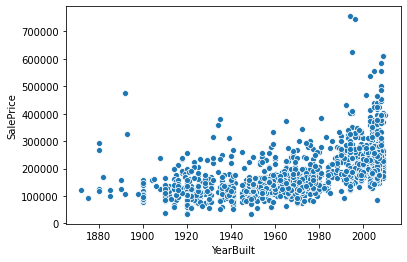

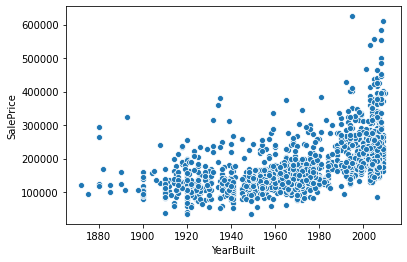

In [11]:
# 築年数をグラフで確認すると一応築年数が新しい方が高い傾向はある。
#plt.figure(figsize=(20, 10))
sns.scatterplot(data=train, x='YearBuilt', y='SalePrice')
plt.show()

# 外れ値の削除
mask1 = (train['YearBuilt'] > 1900) | (train['SalePrice'] < 400000)
mask2 = (train['SalePrice'] < 700000)
train = train[mask1 & mask2]
#plt.figure(figsize=(20, 10))
sns.scatterplot(data=train, x='YearBuilt', y='SalePrice')
plt.show()



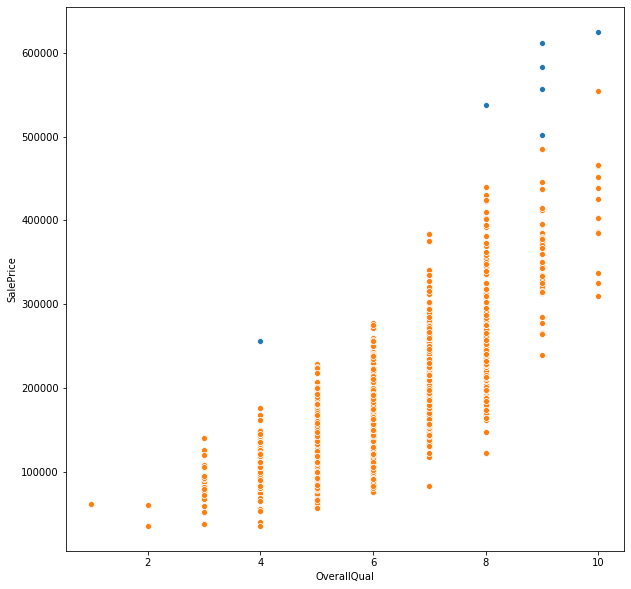

In [12]:
# 家の材質
plt.figure(figsize=(10, 10))
plt.xlabel("OverallQual")
plt.ylabel("SalePrice")
sns.scatterplot(data=train, x='OverallQual', y='SalePrice')

# 外れ値除外
drop_indices1 = train[(train['OverallQual'] < 5) & (train['SalePrice'] > 200000)].index
drop_indices2 = train[(train['OverallQual'] < 10) & (train['SalePrice'] > 500000)].index


train = train.drop(drop_indices1)
train = train.drop(drop_indices2)
train = train[(train['OverallQual'] < 10) | (train['SalePrice'] < 600000)]
sns.scatterplot(data=train, x='OverallQual', y='SalePrice')
plt.show()


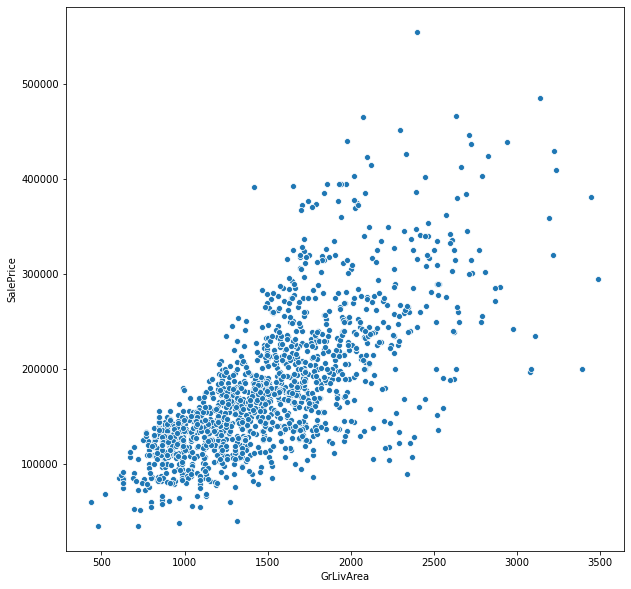

In [13]:
# リビングの広さは別で確認する
X = 'GrLivArea'
Y = 'SalePrice'
plt.figure(figsize=(10, 10))
plt.xlabel(X)
plt.ylabel(Y)

# まあまあな線形性
sns.scatterplot(data=train, x=X, y=Y)


## 最終的にメインで使用する特徴量

* 1stFlrSF
* 2ndFlrSF
* TotalBsmtSF
* TotalSF(1stFlrSF + 2ndFlrSF + TotalBsmtSF)
* YearBuilt
* OverallQual
* GrLivArea

In [14]:
"""

テストデータの確認と前処理

"""

# とりあえず欠損値の確認
#test.isnull().sum().sort_values(ascending=False)

# TotalBsmtSFは欠損値があるので平均で埋める
#display(test['TotalBsmtSF'].describe())
#test['TotalBsmtSF'].fillna(test['TotalBsmtSF'].mean(), inplace=True)
"""
↑勾配ブースティング木では欠損値の補完が不要らしいのでやめる
"""


# 1F, 2F, 地下の合計の特徴量を作成し、外れ値を削除
test['TotalSF'] = test['1stFlrSF'] + test['2ndFlrSF'] + test['TotalBsmtSF']

# とりあえず学習させてみる
"""
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb
"""

ModuleNotFoundError: No module named 'xgboost'